# 主成分分析（PCA）

次元削減（Dimensionality Reduction）の手法

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
x = dataset.data
t = dataset.target

In [5]:
feature_names = dataset.feature_names

In [6]:
pd.DataFrame(x, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2, random_state=0)

n_componentsで何次元に削減するかを指定する。
2次元にすると可視化できる。

In [9]:
# 教師なし学習なのでtは使わない
pca.fit(x)

PCA(n_components=2, random_state=0)

In [10]:
# 第二主成分までの分散を確認する
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

主成分へ写像するためにはtransformメソッドを使う

## 写像
たとえば第一主成分を抽出する際、分散が最も大きな方向へ点を移動させる。
このとき軸に直行する方向の情報が失われる代わりに、次元を落とすことができる。
この処理を写像という。

In [11]:
x_transformed = pca.transform(x)

In [12]:
df_transformed = pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分'])
df_transformed.head()

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [13]:
# 第一主成分の寄与率
pca.explained_variance_ratio_[0]

0.9246187232017271

In [14]:
# 第二主成分の寄与率
pca.explained_variance_ratio_[1]

0.05306648311706782

In [15]:
# 第二主成分までで97.7%の情報を説明できている
# 3%弱は失われていることがわかる
1 - (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

0.022314793681205036

In [16]:
# ラベル（目標値）の確認
np.unique(t)

array([0, 1, 2])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

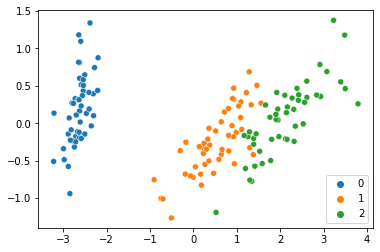

In [17]:
# ラベルで色分けしてプロット
pc1 = x_transformed[:, 0] # 第一主成分の列
pc2 = x_transformed[:, 1] # 第二主成分の列
sns.scatterplot(pc1, pc2, hue=t, palette=sns.color_palette(n_colors=3))

## 標準化

ここまでは前処理せず主成分分析を行ったが、実際は必ず標準化を行う。

標準化とは、各特徴量を平均0、分散が1になるように変換すること。
主成分分析では、分散が最大になるように計算するため。

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

標準化したデータに対して主成分分析してみる

In [20]:
pca = PCA(n_components=2, random_state=0)

In [21]:
x_scaled_transformed = pca.fit_transform(x_scaled)

In [22]:
df_transformed = pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分'])
df_transformed.head()

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [23]:
# 第一主成分の寄与率
pca.explained_variance_ratio_[0]

0.7296244541329987

In [24]:
# 第二主成分の寄与率
pca.explained_variance_ratio_[1]

0.2285076178670178

標準化をしたことにより第二主成分の寄与率が増えているが、代わりに第二主成分までで説明できていない情報も増えている。

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

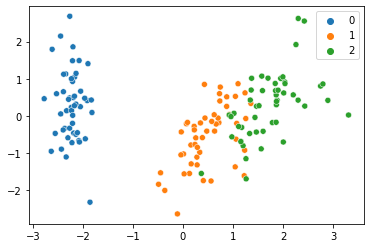

In [25]:
# ラベルで色分けしてプロット
pc1 = x_scaled_transformed[:, 0] # 第一主成分の列
pc2 = x_scaled_transformed[:, 1] # 第二主成分の列
sns.scatterplot(pc1, pc2, hue=t, palette=sns.color_palette(n_colors=3))